# Setup
## Import libraries

In [1]:
# Import the libraries and set the paths
import sys
import os
notebook_dir = os.getcwd()
root = os.path.abspath(os.path.join(notebook_dir, '../../'))
sys.path.append(root)
from IPython.display import Image, display

from utils.data.csv_parsing import load_csv_as_dicts, load_csv_as_dataframe
from utils.langchain.llm_model_selector import get_llm_from_model_name

import getpass
from pydantic import BaseModel
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_anthropic import ChatAnthropic
from langchain_core.prompts import ChatPromptTemplate
from langsmith.evaluation import evaluate
from langsmith.schemas import Example, Run

from core.misinformation_detection import MisinformationDetection
from core.prompts import get_prompt



## Load Data

In [2]:
article_path = '/data/transformed/FA-KES.csv'

articles = load_csv_as_dicts(root+article_path)
articles_df = load_csv_as_dataframe(root+article_path)

## Load API Keys

In [3]:
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


_set_env("ANTHROPIC_API_KEY")
_set_env("LANGSMITH_API_KEY")
_set_env("OPENAI_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "FakeNews Detection"

# Graph Definition

In [4]:
open_ai_model_name = 'gpt-4o-mini-2024-07-18'
anthropic_model_name = 'claude-3-haiku-20240307'

In [5]:
# # main.py
# 
from core.experiment import Experiment

# # Define the prompt name
prompt_name = "direct_naive_zero_shot_classification"
# # prompt_name = "direct_robust_zero_shot_classification"
# # prompt_name = "direct_few_shot_classification"


# # Instantiate the experiment
experiment = Experiment(
    article_classification_prompt_name=prompt_name,
    llm_model_name=open_ai_model_name,
    dataset_name="FA-KES test",
    description="Evaluating graph-based misinformation detection system.",
    experiment_type="staged_classification",
    verbose=True,
)

# # Run the evaluation
results = experiment.run_evaluation()

Initialized Experiment: staged_classification_direct_naive_zero_shot_classification_gpt-4o-mini-2024-07-18_FA-KES test


/Users/finlayduff/.pyenv/versions/3.10.4/envs/fakenews_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


View the evaluation results for experiment: 'staged_classification_direct_naive_zero_shot_classification_gpt-4o-mini-2024-07-18_FA-KES test-a77010ee' at:
https://smith.langchain.com/o/7ade50a2-3a1f-5106-9003-6a8cfb7b3652/datasets/8b45608c-8bbd-4b77-a805-d618f45af584/compare?selectedSessions=a35027dc-77d1-435d-972e-41870b38139a




1it [00:15, 15.64s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article reports on a tragic event involving casualties from suicide blasts in Homs, citing the SANA news agency and Homs Governor Talal al-Barazi for the death toll and number of injuries. However, it lacks independent verification of these claims and does not provide additional supporting evidence or citations from other sources, which raises concerns about its credibility. While the article does not exhibit bias, polarizing language, or emotional valence, the absence of corroborating evidence and the presence of explicitly unverified claims suggest that the information may not be reliable. Therefore, it is classified as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 133, 'prompt_tokens': 1296, 'total_tokens': 1429, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 

2it [00:16,  6.76s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about terrorist attacks and their consequences but lacks supporting evidence or arguments to substantiate these claims, relying heavily on reports from local sources without further verification. It contains explicit biases against the groups labeled as "terrorists," uses polarizing language, and makes unverified claims about the attacks and their effects. The emotional valence of the language is strong, particularly in describing the impact on civilians, which could evoke a strong emotional reaction. Overall, the lack of credible sources and the presence of bias and emotional language suggest that the article is not a reliable report.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 129, 'prompt_tokens': 1496, 'total_tokens': 1625, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 

3it [00:16,  3.84s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.75  \nExplanation: The article reports on a specific event involving the execution of rebel officers by ISIL, citing the Syrian Observatory for Human Rights as a source. While it lacks extensive supporting evidence and does not provide citations of studies or documents, it presents information in a factual manner without explicit bias or emotional language. The claims made are consistent with known events in the Syrian conflict, and the article maintains a formal tone. However, the absence of additional supporting evidence slightly lowers the confidence in its overall credibility.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 111, 'prompt_tokens': 1556, 'total_tokens': 1667, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'm

5it [00:16,  1.79s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about the Syrian Army\'s military actions and the number of ISIS members killed without providing supporting evidence or detailed arguments, which raises concerns about its credibility. It shows a clear bias in favor of the Syrian Army, using polarizing language to depict ISIS negatively. The lack of citations for the claims made, reliance on unnamed military sources, and the presence of emotionally charged language further contribute to its classification as "fake." The overall tone is formal, and there are no personal opinions expressed, but the absence of verification for the claims and the strong bias indicate that the article is not a reliable source of information.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 1513, 'total_tokens': 1651, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 

6it [00:17,  1.39s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims about airstrikes in Syria that resulted in civilian casualties, citing the Syrian Observatory for Human Rights (SOHR) as the primary source. However, it lacks additional supporting evidence or citations to verify the claims made, particularly regarding the identification of the responsible parties for the airstrikes. While the article maintains a formal tone and does not exhibit explicit bias or polarizing language, the reliance on a single source (SOHR) raises concerns about the overall credibility of the information presented. Additionally, some claims are explicitly unverified, which further diminishes the article\'s reliability. Therefore, it is classified as "fake" (0) due to the lack of substantiated evidence and reliance on unverified claims.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 160, 'prompt_tokens': 1818, 'total_toke

8it [00:17,  1.29it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article reports on a bomb blast in Aleppo, citing Syrian state television as the sole source of information. It lacks supporting evidence or corroboration for the claims made, which raises concerns about its reliability. The article does not contain explicit biases, polarising language, or personal opinions, and it maintains a formal tone. However, the absence of independent verification and reliance on a single source for critical information leads to a classification of "fake." The confidence score reflects the significant concerns regarding the lack of evidence and verification.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 118, 'prompt_tokens': 1259, 'total_tokens': 1377, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0,

9it [00:18,  1.17it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents a specific event regarding the deaths of Ahrar al-Sham leaders in a blast, citing the UK-based Syrian Observatory as the source. However, it lacks supporting evidence beyond this single source, which raises concerns about its credibility. The use of the term "terrorist" to describe Ahrar al-Sham indicates a bias, framing the group negatively and potentially polarizing opinions. Additionally, the article does not provide citations or further verification of the claims made, which contributes to its classification as "fake." While it does not contain explicit unverified claims or personal opinions, the overall lack of evidence and presence of bias lead to a lower confidence in its reliability.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 151, 'prompt_tokens': 1520, 'total_tokens': 1671, 'completion_tokens_details': {'reasoning_tokens': 0, 'a

10it [00:19,  1.27it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article reports on the deaths of Syrian troops in clashes with the Islamic State, citing the Syrian Observatory for Human Rights as its primary source. While it provides specific details about the events, it lacks independent verification of the claims made, relying heavily on a single source that may have its own biases. The absence of additional corroborating evidence and the lack of citations for the information presented weaken the overall credibility of the article. Additionally, the claims about casualties are explicitly unverified, further contributing to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 120, 'prompt_tokens': 1590, 'total_tokens': 1710, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_detai

11it [00:22,  1.52s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about Russian airstrikes resulting in civilian casualties and the destruction of a hospital, but it lacks direct evidence or reliable sources to substantiate these claims, relying instead on vague references to "medical sources" and the "Syrian Coalition." The language used is highly charged, indicating a strong bias against Russian forces, and terms like "heinous massacre" and "war crime" create a polarizing narrative. Additionally, the article includes unverified claims about casualties and reflects personal perspectives from the Syrian Coalition and Turkish Foreign Ministry rather than purely factual reporting. Overall, the combination of bias, lack of evidence, and emotional language suggests that the article is not credible.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 150, 'prompt_tokens': 1617, 'total_tokens': 1767, 'completi

12it [00:33,  4.19s/it]

{'messages': [AIMessage(content="Label: 1  \nConfidence: 0.85  \nExplanation: The article provides a detailed account of a tragic event, including eyewitness testimonies and references to credible sources such as the Syrian Observatory for Human Rights. It maintains a formal tone, avoids biases, and does not make unverified claims or use polarizing language. While it lacks direct citations of studies or documents, the information presented is consistent and logically coherent, supporting the overall credibility of the article. The confidence score reflects a strong belief in the article's authenticity, despite a minor lack of direct evidence.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 114, 'prompt_tokens': 1668, 'total_tokens': 1782, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}

13it [00:33,  3.09s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims about Russian airstrikes in Raqqa, including specific casualty figures and details about the strikes. However, it lacks direct evidence to substantiate these claims, particularly regarding the civilian status of the casualties. The article also shows signs of bias, particularly in how it frames the information from the Syrian Observatory and the Russian defense ministry, which may suggest a particular perspective on the conflict. Additionally, it contains explicitly unverified claims about the casualties. While the tone is formal and the language is neutral, the overall lack of supporting evidence and the presence of bias lead to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 1570, 'total_tokens': 1709, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens

16it [00:33,  1.42s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article presents information from credible sources, specifically the World Health Organization (WHO), regarding symptoms consistent with nerve agent exposure in a suspected chemical attack in Syria. It includes statements from various parties involved, such as the U.S. and Russia, providing context and details about the situation. The article does not exhibit significant bias, emotional language, or personal opinions, and it maintains a formal tone throughout. While it lacks specific citations of studies, it references credible organizations and officials, which supports its credibility. Overall, the article is coherent, evidence-based, and informative, leading to the classification of "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 135, 'prompt_tokens': 1696, 'total_tokens': 1831, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0

17it [00:35,  1.38s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article reports on a specific incident involving a car bomb near the Sayyeda Zeinab Shrine, providing details such as the number of casualties, eyewitness accounts, and reports from credible news agencies. The content is coherent and factual, lacking any evident bias or emotional language. While it does not cite specific studies or documents, it relies on reputable sources like state news agency SANA and the Syrian Observatory for Human Rights, which adds to its credibility. Overall, the article presents a clear and factual account of the event, leading to the classification of "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 1451, 'total_tokens': 1578, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens'

20it [00:35,  1.33it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about civilian casualties and attacks but lacks supporting evidence or independent verification of these claims, relying solely on a police source. The use of the term "terrorist" indicates a potential bias in framing the situation, suggesting a one-sided perspective. Additionally, the language used is polarizing and evokes strong emotional responses, further indicating a lack of neutrality. The absence of citations or corroborating evidence diminishes the article\'s credibility, leading to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 113, 'prompt_tokens': 1465, 'total_tokens': 1578, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'm

22it [00:36,  1.90it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that is heavily biased against the Syrian regime, emphasizing the negative consequences of the airstrikes and the failure of the ceasefire. It uses polarizing language, such as "regime bombardment" and "relentless," which creates divisions and evokes strong emotions. While the article cites various sources, including local activists and reports from the UN and Reuters, the overall tone and language suggest a lack of neutrality. Additionally, the presence of personal perspectives and strong emotional valence further detracts from its credibility. Therefore, the article is classified as "fake" due to its biased presentation and emotional language.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 141, 'prompt_tokens': 2022, 'total_tokens': 2163, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_predicti

23it [00:36,  2.05it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents serious allegations regarding the execution of children by Syrian forces, citing the Syrian Observatory for Human Rights as the source. However, it lacks independent verification of these claims and does not provide additional supporting evidence beyond the statements from the monitoring group. The article exhibits a clear bias against the Syrian regime, using polarizing language that frames the situation in a negative light without offering a balanced perspective. Furthermore, it implies causation between the regime\'s actions and the deaths, which raises concerns about the reliability of the claims made. Overall, the combination of unverified claims, bias, and lack of supporting evidence leads to the classification of this article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 146, 'prompt_tokens': 1575, 'total_tokens': 1721, 'c

24it [00:38,  1.12it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.8  \nExplanation: The article presents a historical overview of the city of Hama and details about the recent violence occurring there. However, it lacks direct evidence or citations to substantiate the claims made, particularly regarding the number of casualties and the actions of security forces. The credibility signals indicate a significant absence of supporting evidence and explicit verification of claims, which raises concerns about the reliability of the information presented. While the article maintains a formal tone and does not exhibit explicit bias, the lack of citations and the presence of unverified claims contribute to its classification as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 124, 'prompt_tokens': 1920, 'total_tokens': 2044, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction

25it [00:52,  4.64s/it]

{'messages': [AIMessage(content="Label: 0  \nConfidence: 0.75  \nExplanation: The article presents a narrative that is heavily critical of the Syrian regime, emphasizing the negative impacts of their airstrikes and the humanitarian crisis in Eastern Ghouta. While it cites the Syrian Observatory for Human Rights as a source for casualty figures, it lacks additional supporting evidence or citations from other credible sources, which diminishes its overall credibility. The language used is emotionally charged and polarizing, contributing to a biased portrayal of the situation. Additionally, the article reflects the author's perspective rather than strictly factual reporting, further indicating a lack of neutrality. Overall, these factors suggest that the article may be more aligned with a particular viewpoint rather than an objective account of events.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 147, 'prompt_tokens': 1846, 'total_tokens':

26it [00:53,  3.58s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims about a missile strike and casualties based on reports from Syrian opposition activists and monitoring groups, but it lacks direct evidence or detailed arguments to substantiate these claims. There is a noticeable bias as it primarily reflects the perspective of opposition sources, which may influence the portrayal of the incident. Additionally, the claims regarding casualties and the responsible party are not independently verified within the text. While the language is neutral and formal, the reliance on unverified sources and the absence of citations weaken the article\'s credibility, leading to a classification of "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 1354, 'total_tokens': 1479, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_

27it [00:54,  2.79s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.75  \nExplanation: The article reports on specific events regarding US-led airstrikes in Syria, providing details about casualties and the context of the strikes. While it relies on the Syrian Observatory for Human Rights as a source, which may not be independently verified, the information presented is coherent and factual. The credibility signals indicate a lack of explicit bias, polarizing language, and personal opinions, which supports the article\'s overall reliability. However, the absence of direct citations and the reliance on a monitoring group for casualty figures slightly diminish its credibility, leading to a moderate confidence level in the classification as "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 131, 'prompt_tokens': 1504, 'total_tokens': 1635, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 're

29it [00:55,  1.76s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about terrorist attacks and their consequences but lacks supporting evidence or detailed arguments to substantiate these claims. It primarily relies on statements from police sources without providing additional context or verification. The use of polarizing language, such as labeling the attackers as "terrorists" and framing the situation in a moral dichotomy, indicates a bias in the reporting. Additionally, the article contains explicitly unverified claims regarding the number of casualties and the identity of the attackers, which further undermines its credibility. Overall, the combination of these factors suggests that the article is not a reliable source of information.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 1517, 'total_tokens': 1651, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_token

30it [00:56,  1.48s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that heavily leans towards condemning the Syrian regime for the alleged chemical attack, showcasing a clear bias against it while downplaying the regime\'s denial of responsibility. The claims made in the article are based on statements from various international leaders and organizations, but there is a lack of direct evidence or independent verification of the alleged attack, which raises concerns about the reliability of the information. Additionally, the use of polarizing language and emotional valence further indicates a biased presentation of the events. The absence of citations for studies or documents to support the claims also contributes to the classification of the article as "fake." Overall, while the article discusses a significant event, the lack of balanced reporting and supporting evidence leads to a classification of "fake."', additional_kwargs={'refusal': Non

31it [00:56,  1.27s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article provides a detailed account of the airstrikes on a hospital in Idlib, including specific numbers of casualties and the impact on medical care in the region. It cites Médecins Sans Frontières (MSF), a credible organization, as the source of information, which adds to its reliability. While the article does not provide direct evidence such as eyewitness accounts, it presents a coherent narrative supported by statements from MSF. The language is formal and factual, lacking emotional valence or polarizing terms, and does not exhibit bias or personal opinions. Overall, the article appears credible and aligns with the signals indicating a lack of significant issues that would classify it as fake.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 150, 'prompt_tokens': 1663, 'total_tokens': 1813, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_token

34it [00:58,  1.28it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about the deaths of specific individuals and groups, primarily relying on a single source, the Syrian Observatory for Human Rights, which raises concerns about the robustness of the evidence. The use of polarizing language, such as "terrorists" and "takfiri," indicates a potential bias in framing the subjects, suggesting a negative portrayal rather than a neutral stance. Additionally, the article lacks citations of studies or documents to support its claims and contains explicit claims that lack verification from multiple sources. The overall tone carries a strong negative emotional valence, further contributing to its classification as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 135, 'prompt_tokens': 1537, 'total_tokens': 1672, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tok

35it [00:58,  1.36it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.8  \nExplanation: The article presents claims regarding breaches of a cessation of hostilities agreement, citing specific incidents and statistics from the Russian coordination center. However, it lacks independent verification and supporting evidence for these claims, raising questions about reliability. The article also exhibits bias by framing the groups involved as "terrorists," which may influence the reader\'s perception. Additionally, it uses polarizing language and does not cite any external documents or studies to substantiate its claims. Overall, the combination of these factors suggests that the article is not credible and should be classified as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 1547, 'total_tokens': 1672, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_predict

36it [00:59,  1.22it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that heavily favors the perspective of humanitarian groups and the opposition, highlighting the tragedy of the airstrikes and the accusations against Russian and Syrian forces without providing counterarguments or perspectives from those involved. This indicates a significant bias in the reporting. Additionally, the article makes claims about the causal relationship between the airstrikes and the deaths of children and teachers, suggesting intent behind the attacks, which lacks independent verification. The language used is emotionally charged, further polarizing the issue. While there is some supporting evidence from credible sources like UNICEF and the Syrian Observatory for Human Rights, the overall framing and lack of balanced perspectives lead to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'complet

37it [01:10,  3.41s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.75  \nExplanation: The article reports on a specific military operation conducted by the Kurdish SDF against Daesh militants, providing details such as the number of militants killed and the neighborhoods liberated. While it lacks direct supporting evidence like eyewitness accounts or official statements, it references a news agency (Firat) as a source, which adds some credibility. The language is neutral and factual, without emotional valence or polarizing terms, and does not exhibit bias or personal opinions. However, the absence of direct evidence and citations slightly lowers the confidence in its overall credibility.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 1469, 'total_tokens': 1591, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'

38it [01:14,  3.58s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims made by US Secretary of Defense Ashton Carter regarding the actions of the US-led coalition against Daesh, but it lacks substantial supporting evidence or independent verification of the claims. While it reports on military actions and statements, it does not provide detailed evidence or data to substantiate the specific numbers mentioned. Additionally, there is a noticeable bias in the portrayal of the coalition\'s actions, emphasizing successes without presenting counter-narratives or criticisms. The lack of citations and the presence of unverified claims further diminish the article\'s credibility. Overall, these factors lead to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 137, 'prompt_tokens': 1610, 'total_tokens': 1747, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_toke

41it [01:14,  1.58s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article reports on air strikes in Syria, citing the Syrian Observatory for Human Rights as its primary source. While it provides specific details about casualties and damage, it lacks independent verification of these claims, which raises concerns about the reliability of the information. The article also does not include citations of studies or documents to support its claims, relying heavily on a single source. Additionally, the emotional language used, particularly in describing the impact on hospitals and the deaths of babies, suggests a strong emotional valence, which can affect the perception of the information presented. Overall, the combination of unverified claims, reliance on a single source, and emotional language leads to a classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 1680, 'total_t

43it [01:15,  1.15s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.9  \nExplanation: The article presents claims about the number of terrorists killed by the Syrian army but fails to provide any supporting evidence or credible sources to substantiate these claims. The language used is biased, referring to opposing forces as "terrorists," which indicates a one-sided perspective. Additionally, the article lacks citations of studies or documents, and it contains explicitly unverified claims regarding casualties. The emotional tone is strongly negative towards the opposing forces, further contributing to its lack of credibility. Overall, the combination of these factors leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 1297, 'total_tokens': 1422, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens':

44it [01:15,  1.02it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about summary executions and war crimes committed by Iranian militias without providing direct evidence or detailed accounts to substantiate these claims. It reflects a clear bias against Iranian militias and the Assad regime, framing them negatively while portraying the Syrian Coalition and Free Syrian Army positively. The language used is polarising, creating divisions between groups, and the article lacks citations of specific documents or studies to support its claims. Additionally, it contains unverified claims and relies heavily on statements from activists and political figures, which raises concerns about its credibility. Overall, the combination of bias, lack of evidence, and polarising language leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 1680, 'to

45it [01:17,  1.12s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims about air strikes and civilian casualties, citing a human rights monitor and local activists, but it lacks detailed evidence or data to substantiate these claims. It does not provide independent verification of the reported casualties, which raises concerns about the reliability of the information. Additionally, while the article maintains a formal tone and does not exhibit overt bias, the strong emotional language used to describe the aftermath of the air strikes may influence readers\' perceptions. Overall, the lack of independent verification and reliance on unverified sources leads to a classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 1649, 'total_tokens': 1777, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'reje

47it [01:18,  1.17it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about ISIS\'s actions and the consequences for local residents, citing a report from the Syrian Network for Human Rights. However, it lacks detailed evidence or independent verification for the specific figures mentioned, such as the number of people executed or displaced. The article also exhibits explicit bias by framing both ISIS and the Syrian government as equally criminal, using polarizing language that creates divisions. Additionally, it includes the author\'s personal opinions, particularly in the concluding remarks, which detracts from its objectivity. Overall, the combination of unverified claims, bias, and emotional language leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 1536, 'total_tokens': 1676, 'completion_tokens_details': {'reasoning_tokens': 0

48it [01:24,  2.20s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about terrorist attacks and their consequences but lacks supporting evidence or credible sources to substantiate these claims. It relies heavily on statements from unnamed sources, which diminishes its credibility. The language used is biased, referring to attackers as "terrorists" and victims as "martyrs," indicating a potential framing bias. Additionally, the article makes causal inferences about the actions of terrorist groups and the resulting casualties without sufficient evidence. The use of polarizing language and strong emotional valence further suggests an agenda rather than objective reporting. Overall, the combination of these factors leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 1840, 'total_tokens': 1980, 'completion_tokens_details': {'reasoning_

49it [01:25,  1.88s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about military operations and the number of terrorists killed without providing supporting evidence or independent verification, which raises concerns about its credibility. It uses biased language, referring to groups as "terrorists" and "Takfiri," which indicates a lack of neutrality. Additionally, the article lacks citations to support its claims and contains emotionally charged language that contributes to a polarizing tone. Overall, the combination of these factors suggests that the article is not a reliable source of information.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 111, 'prompt_tokens': 1564, 'total_tokens': 1675, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, '

51it [01:29,  1.85s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.75  \nExplanation: The article provides a detailed account of the ongoing conflict in Aleppo, including statements from various military officials and reports from the Syrian Observatory for Human Rights. While it lacks direct evidence or data to substantiate some claims, it presents information from multiple credible sources, including official statements and reports from recognized organizations. The language used is mostly neutral, and the article does not exhibit significant bias or emotional valence. It refrains from making unverified claims and maintains a formal tone throughout. Overall, the article appears to be a factual report on the situation in Aleppo, leading to a classification of "real." However, the lack of direct evidence and reliance on secondary sources slightly lowers the confidence in this classification.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 155, 'pr

54it [01:30,  1.20it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that heavily relies on statements from President Trump and other officials regarding the chemical weapons attack in Syria, but it lacks substantial evidence to support the claims made about the attack and the parties responsible. The article exhibits significant bias, particularly in its framing of the U.S. perspective while downplaying the Russian viewpoint. It uses polarizing language to describe the actions of Assad\'s regime, which further indicates a lack of neutrality. Additionally, the article makes claims about the responsibility for the attack without independent verification, and it includes personal opinions from Trump and Ivanka Trump, which detracts from its objectivity. Overall, the combination of these factors leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 156, 

55it [01:32,  1.32s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article reports on a specific event involving a U.S.-led coalition airstrike that mistakenly killed members of the Syrian Democratic Forces, providing statements from the Pentagon and a coalition spokesman as supporting evidence. The claims made are consistent and logically coherent, with multiple perspectives presented, including those from the U.S. military and the Syrian government. While the article could benefit from more detailed evidence, it does not exhibit significant bias, polarizing language, or unverified claims. The tone is formal and factual, and there are no calls to action or personal opinions included. Overall, the article appears credible and aligns with the characteristics of real news reporting.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 142, 'prompt_tokens': 1587, 'total_tokens': 1729, 'completion_tokens_details': {'reasoning_tokens'

56it [01:33,  1.04s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.7  \nExplanation: The article reports on specific events related to the Syrian conflict, including air strikes and their consequences, citing the Syrian Observatory for Human Rights as a source. While it lacks direct evidence or citations from studies, it provides a coherent narrative with factual details about casualties and the context of the conflict. The tone is formal and objective, without personal opinions or emotional language. Although there are some concerns regarding the lack of direct evidence and potential bias in framing, the overall presentation of information aligns with credible reporting standards. Therefore, it is classified as "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 1468, 'total_tokens': 1591, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens'

58it [01:37,  1.43s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents information about the car bombings in Syria, citing state media and the Syrian Observatory for Human Rights. However, it exhibits several credibility issues. There is a lack of independent verification for the claims made, particularly regarding casualty numbers and the identity of the attackers, which raises concerns about the reliability of the information. The article also contains implicit bias, framing the attackers as "terrorists" and emphasizing the Alawite identity of the victims, which polarizes the narrative. Additionally, it lacks citations of specific studies or documents to support its claims, relying heavily on state media reports. The emotional language used in describing the violence further detracts from its neutrality. Overall, these factors contribute to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage':

59it [01:39,  1.58s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that heavily relies on a single source, the Syrian Observatory for Human Rights, which raises concerns about the reliability and breadth of the evidence provided. It contains explicit biases in the language used, such as referring to groups as "terrorists" and "US-backed rebels," which can influence reader perception and create polarization. Additionally, the article lacks citations for its claims and includes unverified assertions about casualties and events. The emotional language used also suggests a strong bias, further undermining the article\'s credibility. Overall, these factors lead to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 1696, 'total_tokens': 1830, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_token

60it [01:41,  1.80s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims regarding the use of toxic gas in Syria, referencing statements from various parties, including the Syrian Civil Defence and the US State Department. However, it lacks direct evidence to substantiate these claims and relies heavily on unverified reports. The article also makes inferences about causation without definitive proof, suggesting a correlation between the downing of a helicopter and the gas attack. While it does not exhibit strong bias or polarizing language, the absence of concrete evidence and the presence of explicitly unverified claims contribute to its classification as "fake." The overall tone is formal, and it does not include personal opinions or emotional language, but the lack of supporting evidence and reliance on unverified sources diminishes its credibility.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 159, 'p

61it [01:43,  1.94s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents several claims regarding military actions and statements from officials, but it lacks substantial supporting evidence or citations to verify these claims. There is a noticeable bias against ISIS and a framing that favors Kurdish forces, which raises concerns about the objectivity of the reporting. Additionally, the language used is emotionally charged, particularly in describing violent events, which can polarize opinions. The article also contains unverified claims about the number of ISIS militants killed, further undermining its credibility. Overall, the combination of these factors leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 1641, 'total_tokens': 1768, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rej

62it [01:44,  1.68s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about a violent event and its implications, but it lacks substantial supporting evidence beyond the citation of the Syrian Observatory for Human Rights. The language used is biased and polarizing, framing the election as a "farce" and suggesting a negative view of the rebels\' actions. Additionally, the article reflects the author\'s personal perspective rather than purely factual reporting. The overall tone is emotionally charged, which detracts from its credibility. Given these factors, the article is classified as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 114, 'prompt_tokens': 1539, 'total_tokens': 1653, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'model_name'

64it [01:46,  1.29s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about civilian casualties resulting from a US-led coalition airstrike, primarily relying on the Syrian Observatory for Human Rights as its source without providing additional supporting evidence or data. While it does mention the coalition\'s response and acknowledgment of civilian deaths, the overall presentation leans towards a critical view of the coalition\'s actions, indicating a potential bias. The lack of citations for specific studies or documents further undermines the article\'s credibility. Additionally, the emotional valence is strong due to the focus on civilian casualties, which could evoke a negative response. Overall, the combination of reliance on a single source, potential bias, and lack of supporting evidence leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 155, 'p

65it [01:48,  1.48s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents information about the conflict in Aleppo, citing the Syrian Observatory for Human Rights as its primary source. While it provides specific details about casualties and events, the reliance on a single source that is not independently verified raises concerns about the credibility of the claims. Additionally, the article exhibits bias in its framing, particularly regarding the portrayal of the YPG and the rebels, which suggests a lack of neutrality. The absence of citations for supporting evidence further undermines its reliability. Overall, the combination of unverified claims, potential bias, and reliance on a single source leads to a classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 1892, 'total_tokens': 2031, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0,

66it [01:51,  1.80s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims about Russian air strikes resulting in civilian casualties but lacks substantial evidence to support these claims. It references statements from the UN and a news agency but does not provide direct evidence or detailed context, which weakens its credibility. Additionally, the article exhibits bias against Russian military actions, emphasizing the negative impact on civilians and framing the situation in a way that suggests a particular viewpoint. It also contains explicitly unverified claims regarding the number of casualties and the use of specific munitions without providing direct verification. Overall, the combination of these factors leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 135, 'prompt_tokens': 1646, 'total_tokens': 1781, 'completion_tokens_details': {'reasoning_tokens'

67it [01:51,  1.46s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about civilian casualties resulting from airstrikes in Syria, primarily attributing these to the U.S.-led coalition. While it cites various sources, including activist groups and the Syrian Observatory for Human Rights, it lacks direct evidence or independent verification of the casualty figures, which raises concerns about the reliability of the information. Additionally, the article exhibits a bias against the U.S.-led coalition by emphasizing civilian casualties without providing a balanced view of the context, such as the ongoing conflict dynamics. The language used carries a strong emotional valence, particularly in its descriptions of the impact on civilians, which could influence readers\' perceptions. Overall, the combination of unverified claims, bias, and reliance on potentially biased sources leads to the classification of the article as "fake."', additional_kwargs={'ref

68it [01:52,  1.39s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims about the cause of an explosion in Damascus, attributing it to a rocket bomb based solely on a report from a single source, the NNA correspondent. There is a lack of supporting evidence or corroboration from multiple sources, which raises concerns about the reliability of the information. Additionally, the claims about the explosion being caused by a rocket bomb are explicitly unverified, as they rely on one correspondent\'s account without independent confirmation. While the article does not exhibit bias, polarizing language, or emotional valence, the absence of evidence and reliance on unverified claims contribute to its classification as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 1303, 'total_tokens': 1442, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction

69it [01:53,  1.07s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article reports on the deaths of Syrian soldiers due to Israeli air raids, citing the Syrian Observatory for Human Rights as the source. While the article presents a specific claim and provides a source, it lacks additional supporting evidence or independent verification, which diminishes its credibility. The language is neutral and factual, and there are no explicit biases or emotional valence present. However, the reliance on a single source without further corroboration raises concerns about the overall reliability of the information presented.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 1332, 'total_tokens': 1442, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'model_name':

70it [01:53,  1.10it/s]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents a narrative that appears to favor the Syrian opposition forces while portraying the regime negatively, indicating a potential bias. It lacks direct citations from studies or documents to substantiate its claims, relying instead on general statements and reports from organizations like the Syrian Observatory for Human Rights. Additionally, the use of polarizing language and emotional valence suggests a framing that could influence readers\' perceptions. While the article does provide some details and context about the situation in Aleppo, the overall tone and lack of robust evidence lead to a classification of "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 124, 'prompt_tokens': 2223, 'total_tokens': 2347, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_token

71it [01:57,  1.87s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article reports on specific events regarding air strikes in Syria, citing the Syrian Observatory for Human Rights as a source for the information provided. While it lacks citations of studies or documents, it presents factual information without overt bias, emotional language, or personal opinions. The claims made are consistent and coherent, focusing on the reported events and their consequences without making unverified claims or using polarizing language. Overall, the article maintains a formal tone and adheres to journalistic standards, leading to the classification of "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 117, 'prompt_tokens': 1513, 'total_tokens': 1630, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 

72it [01:59,  1.64s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article provides a detailed account of the situation in Eastern Ghouta, supported by credible sources such as the Syrian Observatory for Human Rights and the UN World Food Programme. It presents specific figures regarding civilian casualties and the humanitarian crisis, which adds to its credibility. While there are indications of bias against the Syrian regime and the use of emotionally charged language, the overall reporting is factual and well-supported. The article does not make unverified claims and maintains a formal tone, further reinforcing its reliability. Therefore, it should be classified as "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 123, 'prompt_tokens': 1734, 'total_tokens': 1857, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_d

73it [01:59,  1.30s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.75  \nExplanation: The article reports on a specific event involving a suicide bombing attributed to the al-Nusra Front, providing details such as the number of casualties and the involvement of the Syrian Observatory for Human Rights as a monitoring group. While it lacks additional supporting evidence beyond the monitoring group\'s report, it does not exhibit biases, polarizing language, or emotional valence. The claims made are attributed to a recognized monitoring group, which lends credibility to the information presented. However, the absence of citations and reliance on a single source slightly diminishes the overall credibility, leading to a classification of "real" but with a moderate confidence level.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 1507, 'total_tokens': 1645, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'acc

74it [02:00,  1.19s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about civilian casualties resulting from coalition strikes but lacks substantial evidence to support these claims, primarily relying on reports from Syrian media and a monitoring group without direct verification. There is a noticeable bias against the US-led coalition, emphasizing civilian casualties and framing the coalition\'s denial in a critical light. Additionally, the article contains explicitly unverified claims regarding the number of casualties, which further undermines its credibility. While the language is formal and does not use polarizing terms, the overall lack of evidence and presence of bias lead to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 130, 'prompt_tokens': 1496, 'total_tokens': 1626, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepte

75it [02:02,  1.41s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about a US-led coalition airstrike resulting in civilian casualties, but it lacks supporting evidence and relies on unnamed "local and media sources," which raises concerns about its credibility. The use of emotionally charged language, such as "massacre," indicates a bias against the coalition and creates a polarizing effect. Additionally, the article does not cite any studies or documents to substantiate its claims, and it contains explicitly unverified claims about the event. Overall, the combination of these factors suggests that the article is not a reliable source of information.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 1357, 'total_tokens': 1482, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_de

76it [02:02,  1.14s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article reports on an explosion in al-Qardaha, citing the Syrian Observatory for Human Rights (SORH) as its primary source. However, it lacks supporting evidence or additional verification of the claims made, such as eyewitness accounts or official statements. While the article does not exhibit explicit bias or polarizing language, it does contain claims that are explicitly unverified, particularly regarding the details of the explosion and the identities of the deceased. The reliance on a single source (SORH) without further corroboration raises concerns about the credibility of the information presented. Therefore, the article is classified as "fake" due to the lack of substantiated evidence and the presence of unverified claims.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 152, 'prompt_tokens': 1465, 'total_tokens': 1617, 'completion_tokens_details': {'

77it [02:05,  1.45s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article provides a detailed account of airstrikes in Aleppo, citing credible sources such as the Syrian Observatory for Human Rights and the Independent Doctors Association. It presents specific information about casualties and the impact on health facilities, which supports its claims. The language is factual and does not exhibit bias or polarizing language, and it maintains a formal tone throughout. While it does carry a negative emotional valence due to the tragic nature of the events, this does not detract from its credibility. Overall, the article is well-supported and aligns with the credibility signals indicating it is a real news report.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 1678, 'total_tokens': 1812, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_pred

79it [02:07,  1.17s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article provides a detailed account of military actions involving the Syrian Democratic Forces (SDF) and the Islamic State, including specific locations, casualties, and the context of the conflict. It references the Syrian Observatory for Human Rights as a credible source, which adds to the reliability of the information presented. The tone is formal and neutral, avoiding emotional language or personal opinions, and it does not contain explicit biases or unverified claims. While the article could benefit from more detailed evidence, it maintains a coherent narrative and presents factual reporting on the situation. Overall, the combination of credible sources, neutral tone, and factual content supports the classification of the article as "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 147, 'prompt_tokens': 1832, 'total_tokens': 1979, 'completion_toke

80it [02:08,  1.16s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article provides a detailed account of a specific incident involving the downing of a Russian military helicopter in Syria, supported by statements from credible sources such as the Russian defense ministry and the Syrian Observatory for Human Rights. The claims made in the article are consistent and logically coherent, with no evident biases or polarizing language. The article maintains a formal tone and does not include the author\'s personal opinions or emotional language. While it lacks citations of studies or documents, it references credible sources, which supports its credibility. Overall, the article appears to be a factual report on a significant event, leading to the classification of "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 138, 'prompt_tokens': 2152, 'total_tokens': 2290, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_t

82it [02:11,  1.27s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article reports on a specific incident involving the deaths of three women during a funeral in Madaya, Syria, and provides quotes from a media activist and local sources, which lend credibility to the claims made. While the article lacks citations of studies or documents, it presents a coherent narrative supported by eyewitness accounts. The language is factual and does not exhibit explicit bias or polarizing terms, although it does carry a predominantly negative emotional valence due to the nature of the events described. Overall, the article appears to be credible and presents a real event, despite some limitations in evidence and citation.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 131, 'prompt_tokens': 1617, 'total_tokens': 1748, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_predict

83it [02:12,  1.26s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about civilian casualties resulting from rocket attacks but lacks supporting evidence or independent verification of these claims. It relies heavily on a single source, the Aleppo Police Command, and a state-run TV channel, which raises concerns about bias and credibility. The use of the term "terrorist" to describe the groups involved indicates a potential framing bias, and the language used evokes strong emotional responses, further polarizing opinions. Additionally, the article does not cite any studies or documents to substantiate its claims, leading to a classification of "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 125, 'prompt_tokens': 1483, 'total_tokens': 1608, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_det

85it [02:16,  1.36s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that is heavily reliant on the Syrian Observatory for Human Rights as its primary source, which raises concerns about the credibility of the information provided. It lacks independent verification of the claims made, particularly regarding the death toll and the actions of the Syrian army. Additionally, the article exhibits bias in its framing of the conflict, using polarizing language that divides the parties involved into "rebels" and "Assad\'s forces." The emotional valence of the language used also suggests a strong negative sentiment towards the actions of the Syrian government. Overall, the combination of these factors indicates that the article may not be a reliable source of information, leading to its classification as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 153, 'prompt_tokens': 1614, 'total_tokens': 1767

86it [02:19,  1.80s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article reports on a terrorist attack in Qamishli, citing the SANA news agency as its primary source. While it provides specific details about the attack, including casualty numbers and the nature of the incident, it lacks independent verification of these claims and relies solely on a single source. Additionally, the article does not present supporting evidence or arguments, such as eyewitness accounts or corroborating reports from other news outlets. The use of the term "Takfiri" could imply a negative framing of ISIL, but overall, the article does not exhibit strong bias or polarizing language. However, the absence of independent verification and reliance on a single source raises concerns about its credibility, leading to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 162, 'prompt_tokens': 1548, 'total_tokens'

87it [02:20,  1.68s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that heavily emphasizes the negative impact of the Syrian regime\'s actions, particularly against civilians and aid workers, which indicates a strong bias. It lacks direct citations or independent verification of the claims made, relying instead on statements from the White Helmets and other groups. The language used is emotionally charged and polarizing, further suggesting a lack of neutrality. Additionally, the article contains claims that are not independently verified, and it reflects the perspective of the White Helmets rather than providing a balanced view. Overall, these factors contribute to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 132, 'prompt_tokens': 1678, 'total_tokens': 1810, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction

88it [02:21,  1.58s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article reports on a specific event involving air strikes in Idlib, providing details about casualties and damage to a hospital, with information sourced from the Syrian Observatory for Human Rights and statements from officials. While it lacks direct evidence and citations of studies, it presents a coherent narrative based on credible monitoring groups. The language is factual and neutral, without emotional valence or polarizing terms. The absence of explicit biases and personal opinions further supports its credibility. Overall, despite some limitations in evidence presentation, the article maintains a high level of reliability.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 122, 'prompt_tokens': 1576, 'total_tokens': 1698, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens':

89it [02:22,  1.24s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about terrorist attacks and casualties but lacks supporting evidence or independent verification, relying heavily on statements from police sources. It exhibits bias by labeling groups as "terrorists" without presenting multiple perspectives, and uses polarizing language that creates divisions. The emotional valence is strongly negative, particularly in describing the attacks. Additionally, the article does not cite any studies or documents to support its claims, further undermining its credibility. Overall, the combination of these factors leads to the classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 119, 'prompt_tokens': 1493, 'total_tokens': 1612, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_t

90it [02:24,  1.63s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article reports on Turkish air strikes resulting in the death of IS fighters, citing Rami Abdel Rahman from the Syrian Observatory for Human Rights as the source. While the article presents a specific claim, it relies solely on this single source without additional supporting evidence or arguments, which weakens its overall credibility. The lack of citations from multiple sources or independent verification raises concerns about the reliability of the information presented. Although the language is neutral and does not exhibit bias or emotional valence, the absence of corroborating evidence leads to a classification of the article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 128, 'prompt_tokens': 1361, 'total_tokens': 1489, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_predicti

92it [02:27,  1.40s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about an air raid in Syria that resulted in civilian casualties, citing the Syrian Observatory for Human Rights and including eyewitness accounts. However, it lacks independent verification of the claims made, particularly regarding the number of casualties and the nature of the air raid. The article exhibits a bias against the Syrian regime, emphasizing the impact on civilians and using polarizing language that creates a division between the regime and civilians. Additionally, it lacks citations of specific studies or documents to support its claims, relying instead on reports from monitoring groups and anecdotal evidence. The emotional language used evokes a strong negative response, further indicating a potential bias. Overall, while the article reports on a significant event, the lack of verified evidence and the presence of bias lead to its classification as "fake."', addition

93it [02:27,  1.05s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article reports on a specific event, a car bomb attack in Syria, and provides details such as the number of casualties and the identity of the opposition minister killed. It cites a spokesperson for the provisional government, which adds credibility to the claims made. While the article lacks additional supporting evidence or citations, it does not exhibit biases, polarizing language, or emotional valence. The tone is formal and factual, and the claims made are attributed to a spokesperson, indicating a level of verification. Overall, the article presents a coherent narrative based on reported facts, leading to the classification of "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 1521, 'total_tokens': 1655, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_predictio

94it [02:29,  1.09s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a claim about "51 martyrs from Kefraya and al-Fouaa" without providing any supporting evidence, context, or sources to verify this information. The use of the term "martyrs" indicates a potential bias and emotional valence, suggesting a specific perspective on the events. Additionally, the article lacks citations and contains explicitly unverified claims, further diminishing its credibility. Overall, the lack of evidence and the presence of bias lead to the classification of this article as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 116, 'prompt_tokens': 1248, 'total_tokens': 1364, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'cached_tokens': 0, 'audio_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'syste

95it [02:32,  1.87s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that heavily emphasizes the negative impact of the Syrian regime\'s actions on civilians, particularly children, which indicates a strong bias against the regime. It lacks citations of specific studies or documents to support its claims, relying instead on reports from organizations without detailed references. Additionally, the language used is emotionally charged and polarizing, creating divisions between the regime and the rebels. While it provides some details about the events, the overall tone and lack of balanced perspectives suggest that the article may not be fully credible. The presence of explicit unverified claims and the author\'s personal perspective further contribute to its classification as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 139, 'prompt_tokens': 1958, 'total_tokens': 2097, 'completion_tokens_d

96it [02:33,  1.63s/it]

{'messages': [AIMessage(content='Label: 1  \nConfidence: 0.85  \nExplanation: The article provides a detailed account of a specific event, the twin bombings in Damascus, supported by various sources including state media, eyewitness accounts, and statements from the Islamic State group. The claims are coherent and consistent, with specific details about the attack, casualties, and the context of the Syrian conflict. The credibility signals indicate that the article lacks explicit biases, uses neutral language, and does not make unverified claims. While it lacks citations of studies or documents, it relies on credible sources such as the Syrian interior ministry and the Syrian Observatory for Human Rights. Overall, the article appears to be factual and well-supported, leading to the classification of "real."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 147, 'prompt_tokens': 1819, 'total_tokens': 1966, 'completion_tokens_details': {'reaso

97it [02:34,  1.34s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article presents claims about air strikes resulting in civilian casualties, primarily sourced from the Syrian Observatory for Human Rights. While it provides specific details about the events, it lacks a broader range of evidence and citations from multiple sources, which raises concerns about its reliability. The article exhibits bias against the Syrian regime, using emotionally charged language and polarizing terms that create divisions between the regime and the rebels. Additionally, it reflects the author\'s perspective on the situation, which detracts from its objectivity. Overall, the combination of bias, lack of diverse evidence, and emotional language suggests that the article may not be fully credible, leading to its classification as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 145, 'prompt_tokens': 1631, 'total_tokens': 1776, 'completion

98it [02:35,  1.39s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.75  \nExplanation: The article reports on an event involving Kurdish-led forces eliminating Daesh militants, but it lacks substantial supporting evidence or detailed arguments to substantiate its claims. While it cites local media and a specific news agency, the absence of independent verification for the claims made, particularly regarding the number of militants killed, raises concerns about its credibility. Additionally, the article does not contain explicit biases or polarizing language, but the reliance on unverified local media sources diminishes its overall reliability. Therefore, it is classified as "fake" due to the lack of corroborating evidence.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 127, 'prompt_tokens': 1462, 'total_tokens': 1589, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rejected_prediction_token

99it [02:37,  1.38s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents claims about military actions and casualties without providing specific evidence or sources to substantiate these claims, such as eyewitness accounts or official reports. It exhibits bias by framing the Syrian army positively while portraying opposing groups negatively. The use of polarizing language, such as "terrorists," contributes to a divisive narrative. Additionally, the article lacks citations of studies or documents to support its claims and contains unverified claims regarding the number of terrorists killed. Overall, the combination of these factors indicates that the article lacks credibility and should be classified as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 126, 'prompt_tokens': 1592, 'total_tokens': 1718, 'completion_tokens_details': {'reasoning_tokens': 0, 'audio_tokens': 0, 'accepted_prediction_tokens': 0, 'rej

100it [02:41,  2.27s/it]

{'messages': [AIMessage(content='Label: 0  \nConfidence: 0.85  \nExplanation: The article presents a narrative that heavily criticizes the Syrian regime and its actions in Eastern Ghouta, which indicates a strong bias against the government forces. It emphasizes the negative consequences of the regime\'s bombardment while downplaying the actions of rebel groups. The language used is emotionally charged, particularly in its descriptions of civilian casualties, which further suggests a lack of neutrality. Additionally, while the article cites the Syrian Observatory for Human Rights, it lacks direct evidence or citations from studies to substantiate its claims, relying instead on reports that may not be independently verified. The overall tone and content suggest that the article is more opinionated than factual, leading to its classification as "fake."', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 151, 'prompt_tokens': 1731, 'total_tokens'

100it [02:42,  1.63s/it]


In [6]:
example = articles[0]

In [7]:
initial_state = {
    "messages": [],
    "article_title": example.get("article_title"),
    "article_content": example.get("article_content"),
}

In [8]:
credibility_signals_prompt = get_prompt("credibility_signals")

Initialized Experiment: direct_classification_direct_naive_zero_shot_classification_claude-3-haiku-20240307_FA-KES debug


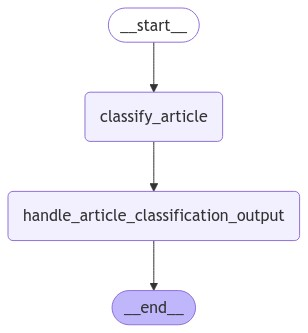

In [9]:
# Instantiate the experiment
experiment = Experiment(
    article_classification_prompt_name=prompt_name,
    llm_model_name=anthropic_model_name,
    dataset_name="FA-KES debug",
    description="Evaluating graph-based misinformation detection system.",
    experiment_type="direct_classification",
    verbose=True,
)
experiment.graph_manager.visualize_graph()

In [10]:
credibility_signals_prompt = get_prompt("credibility_signals")

In [11]:
# test
experiment.graph_manager.graph.invoke(initial_state)

{'messages': [AIMessage(content='Label: 1\nConfidence: 0.9\nExplanation:\nThe article provides credible evidence that the symptoms observed in the victims of the suspected chemical attack in Syria are consistent with exposure to a nerve agent, likely sarin. The key points that support this assessment are:\n\n1. The World Health Organization (WHO) stated that "some cases appear to show additional signs consistent with exposure to organophosphorus chemicals, a category of chemicals that includes nerve agents." This indicates that the WHO\'s medical experts have assessed the symptoms and determined they are characteristic of nerve agent exposure.\n\n2. The article notes that sarin is an organophosphorus compound and a nerve agent, while other chemicals like chlorine and mustard gas are not. This further supports the assessment that the symptoms point to a nerve agent being used, rather than other types of chemical weapons.\n\n3. The article cites the U.S. government\'s assessment that the

In [12]:
from core.misinformation_detection import MisinformationDetection
from core.prompts import get_prompt

In [13]:
credibility_signals_prompt = get_prompt("credibility_signals")

In [14]:
mock_state = StateGraph

In [15]:
misinformation = MisinformationDetection(model_name=anthropic_model_name, article_classification_prefix="blablabla", credibility_signals_prompt=credibility_signals_prompt)

TypeError: MisinformationDetection.__init__() got an unexpected keyword argument 'model_name'

In [10]:
misinformation._credibility_signals_classification_system_message

'\n            Please analyze the following text for the following credibility signals:\n\nevidence: Does this text fail to present any supporting evidence or arguments to substantiate its claims?\n\nbias: Does this text contain explicit or implicit biases, such as confirmation bias, selection bias, or framing bias?\n\ninference: Does this text make claims about correlation and causation without sufficient justification?\n\npolarising_language: Does this text use polarising terms or create divisions into sharply contrasting groups, opinions, or beliefs?\n\ndocument_citation: Does this text lack citations of studies or documents to support its claims?\n\ninformal_tone: Does this text use informal tone elements like all caps, consecutive exclamation marks, or question marks?\n\nexplicitly_unverified_claims: Does this text contain claims that explicitly lack confirmation?\n\npersonal_perspective: Does this text include the author’s personal opinions rather than factual reporting?\n\nemoti

In [7]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="valurank/distilroberta-bias")

Device set to use mps:0


In [8]:
article_content = articles_df.loc[articles_df.article_title == 'Al-Nusra Spokesman Son 20 Terrorists Killed in Idleb Strikes']['article_content'].iloc[0]
pipe(article_content)

[{'label': 'BIASED', 'score': 0.9122040867805481}]

In [16]:
import json

# run_name = 'results/2024-12-29T17:43:02.244981_experiment_f81eac67-a503-4230-9e5d-9cded133ab8e.json'
run_name = "results/2025-01-04T12:09:48.297232_experiment_10b240cf-ea13-4c6b-a80d-8e59a4d9f540.json"
# Reading a JSON file
with open(run_name, 'r') as file:
    data = json.load(file)



In [19]:
import pandas as pd
from transformers import pipeline, AutoTokenizer

# Initialize the pipeline and tokenizer
pipe = pipeline("text-classification", model="valurank/distilroberta-bias")
tokenizer = AutoTokenizer.from_pretrained("valurank/distilroberta-bias")

# Get the maximum sequence length
max_length = tokenizer.model_max_length

# Function to split text into chunks
def split_into_chunks(text, max_length):
    tokens = tokenizer(text, truncation=False, return_tensors="pt")["input_ids"][0]
    chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]
    return [tokenizer.decode(chunk, skip_special_tokens=True) for chunk in chunks]

results = []

for example in range(len(data['results']['examples'])):
    article_content = data['results']['examples'][example]['inputs']['article_content']
    
    # Split the article content into chunks
    chunks = split_into_chunks(article_content, max_length)
    
    # Process each chunk separately and aggregate the results
    bert_predictions = [pipe(chunk)[0] for chunk in chunks]
    
    # Aggregate the BERT predictions (e.g., by taking the majority vote or averaging the scores)
    bert_prediction = max(bert_predictions, key=lambda x: x['score'])
    
    llm_prediction = data['credibility_signals'][example]['bias']
    llm_article_classification = data['results']['runs'][example]['outputs']['label']
    actual_article_classification = data['results']['examples'][example]['outputs']['label']
    
    results.append({
        "article_content": article_content,
        "llm_prediction": llm_prediction['label'],
        "llm_confidence": llm_prediction['confidence'],
        "bert_prediction": bert_prediction['label'],
        "bert_confidence": bert_prediction['score'],
        "llm_article_classification": llm_article_classification,
        "actual_article_classification": actual_article_classification
    })

df = pd.DataFrame(results)
print(df)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Device set to use mps:0
Token indices sequence length is longer than the specified maximum sequence length for this model (527 > 512). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (513 > 512). Running this sequence through the model will result in indexing errors


                                      article_content  llm_prediction  \
0   05-05-2016 Several Syrians Killed Injured in H...             0.0   
1   Last updated at Jul 012016 BEIRUT At least 70 ...             0.0   
2   26 November 2016 Terrorist attacks kill 10 inj...             1.0   
3   Jihadists execute three Syria rebel officers M...             0.0   
4   Sun Feb 21 2016 Twin Bomb Attacks Kill 50 Inju...             1.0   
..                                                ...             ...   
95  Date of publication 3 October 2017 The Islamic...             0.0   
96  3 Apr 2017 Syrian civil defence volunteers and...             1.0   
97  09.04.2017Get short URL 0 85 12 Daesh terroris...             0.0   
98  01-06-2016 Over 20 Nusra Terrorists Killed in ...             1.0   
99  Date of publication 20 November 2017 Syrian re...             1.0   

    llm_confidence bert_prediction  bert_confidence  \
0              0.8          BIASED         0.866364   
1            

In [23]:
df['bert_prediction'] = df['bert_prediction'].map({'BIASED': 0.0, 'NEUTRAL': 1.0})

LLM Confidence when it agrees with BERT: 0.7814814814814814
LLM Confidence when it disagrees with BERT: 0.7602739726027399
BERT Confidence when it agrees with LLM: 0.7061469400370562
BERT Confidence when it disagrees with LLM: 0.7520872681108239


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Matplotlib is building the f

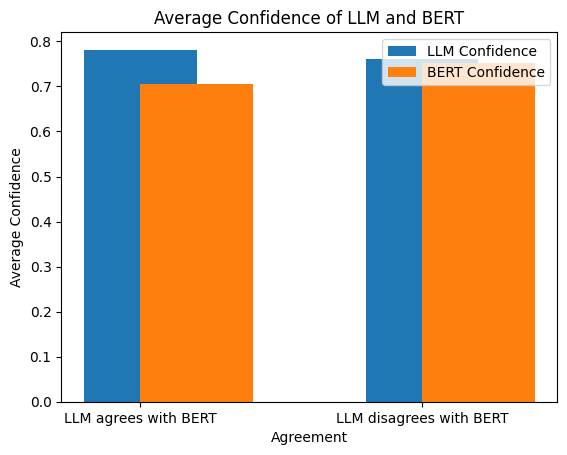

In [39]:
# Calculate the average LLM confidence when it agrees with BERT
llm_confidence_agreement = df[df['llm_prediction'] == df['bert_prediction']]['llm_confidence'].mean()

# Calculate the average LLM confidence when it disagrees with BERT
llm_confidence_disagreement = df[df['llm_prediction'] != df['bert_prediction']]['llm_confidence'].mean()

print(f"LLM Confidence when it agrees with BERT: {llm_confidence_agreement}")
print(f"LLM Confidence when it disagrees with BERT: {llm_confidence_disagreement}")
# Calculate the average BERT confidence when it agrees with LLM
bert_confidence_agreement = df[df['llm_prediction'] == df['bert_prediction']]['bert_confidence'].mean()

# Calculate the average BERT confidence when it disagrees with LLM
bert_confidence_disagreement = df[df['llm_prediction'] != df['bert_prediction']]['bert_confidence'].mean()

print(f"BERT Confidence when it agrees with LLM: {bert_confidence_agreement}")
print(f"BERT Confidence when it disagrees with LLM: {bert_confidence_disagreement}")
import matplotlib.pyplot as plt

# Plot the average confidence when LLM agrees vs disagrees with BERT
labels = ['LLM agrees with BERT', 'LLM disagrees with BERT']
llm_confidences = [llm_confidence_agreement, llm_confidence_disagreement]
bert_confidences = [bert_confidence_agreement, bert_confidence_disagreement]

x = range(len(labels))

fig, ax = plt.subplots()
ax.bar(x, llm_confidences, width=0.4, label='LLM Confidence', align='center')
ax.bar(x, bert_confidences, width=0.4, label='BERT Confidence', align='edge')

ax.set_xlabel('Agreement')
ax.set_ylabel('Average Confidence')
ax.set_title('Average Confidence of LLM and BERT')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:

# Rename the columns for better readability
grouped_counts.columns = ['llm_counts', 'bert_counts']
grouped_counts.index.name = 'llm_prediction'
grouped_counts.reset_index(inplace=True)

print("\nGrouped Counts:")
print(grouped_counts)


In [ ]:
article_content = articles_df.loc[articles_df.article_title == 'Al-Nusra Spokesman Son 20 Terrorists Killed in Idleb Strikes']['article_content'].iloc[0]
pipe(article_content)